In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv("cars.csv", na_values=["", " ", "NA"])

In [31]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    259 non-null float64
 hp             261 non-null int64
 weightlbs      258 non-null float64
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [33]:
df.isna().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [34]:
df.shape

(261, 8)

In [35]:
df = df.dropna()

In [36]:
df.shape

(256, 8)

In [37]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [38]:
df['age'] = 2018 - df[' year']

In [39]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,age
0,14.0,8,350.0,165,4209.0,12,1972,US.,46
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,38
2,17.0,8,302.0,140,3449.0,11,1971,US.,47
3,15.0,8,400.0,150,3761.0,10,1971,US.,47
4,30.5,4,98.0,63,2051.0,17,1978,US.,40


In [40]:
df = df.drop([' brand', ' year'], axis=1)
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age
0,14.0,8,350.0,165,4209.0,12,46
1,31.9,4,89.0,71,1925.0,14,38
2,17.0,8,302.0,140,3449.0,11,47
3,15.0,8,400.0,150,3761.0,10,47
4,30.5,4,98.0,63,2051.0,17,40


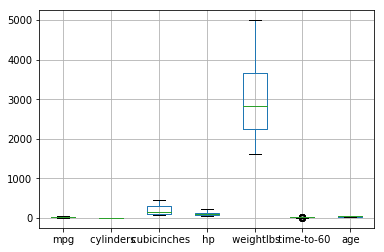

In [47]:
df.boxplot()

### outlier treatment

In [48]:
lower = df.quantile(0.05)
upper = df.quantile(0.95)
outlier_up = (df > upper)
outlier_lower = (df < lower)
df = df.mask(outlier_lower, lower, axis=1)
df = df.mask(outlier_up, upper, axis=1)

In [49]:
df_norm = (df - df.min())/(df.max() - df.min())
df_norm.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age
0,0.040984,1.0,0.841270,0.857143,0.901915,0.108108,0.916667
1,0.774590,0.0,0.012698,0.089796,0.004909,0.324324,0.250000
2,0.163934,1.0,0.688889,0.653061,0.603436,0.000000,1.000000
3,0.081967,1.0,1.000000,0.734694,0.725970,0.000000,1.000000
4,0.717213,0.0,0.041270,0.024490,0.054394,0.648649,0.416667


In [56]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k).fit(df_norm)

In [57]:
kmeans.cluster_centers_

array([[0.08477431, 1.        , 0.83239835, 0.78652502, 0.83855388,
        0.18955942, 0.68150685],
       [0.65160682, 0.00198413, 0.07357017, 0.14927114, 0.15504438,
        0.61218361, 0.4265873 ],
       [0.29997124, 0.50877193, 0.41481481, 0.34113856, 0.50244856,
        0.56472262, 0.49415205]])

In [58]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([ 73, 126,  57], dtype=int64))

## Elbow method

In [61]:
from scipy.spatial.distance import cdist
dist = []
K = [1, 3, 4, 5, 7, 9, 11, 13, 15, 17, 19]
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_norm)
    dist.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1))/ df_norm.shape[0])

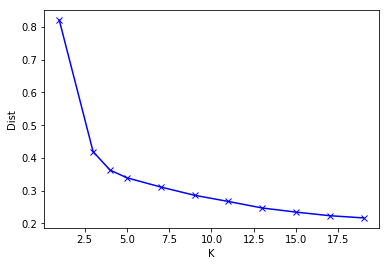

In [62]:
plt.plot(K, dist, 'bx-')
plt.xlabel('K')
plt.ylabel('Dist')
plt.show()

### Silhouette Score

In [65]:
from sklearn.metrics import silhouette_score

K = [3, 4, 5, 7, 9, 11, 13, 15, 17, 19]
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_, metric = "euclidean")
    print("K value: ", k)
    print("silhouette_score: ", score)

K value:  3
silhouette_score:  0.420974835506852
K value:  4
silhouette_score:  0.400413751091152
K value:  5
silhouette_score:  0.34270967458785234
K value:  7
silhouette_score:  0.30199784772452015
K value:  9
silhouette_score:  0.2801454215434866
K value:  11
silhouette_score:  0.2737985790364317
K value:  13
silhouette_score:  0.2835417582250821
K value:  15
silhouette_score:  0.28142373359155404
K value:  17
silhouette_score:  0.27338682722051405
K value:  19
silhouette_score:  0.2777506606837421


In [66]:
kmeans = KMeans(n_clusters=3).fit(df_norm)

In [67]:
df.loc[:, 'cluster'] = kmeans.labels_

In [68]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age,cluster
0,14.0,8,350.0,165.0,4209.0,12.0,46,0
1,31.9,4,89.0,71.0,1925.0,14.0,38,1
2,17.0,8,302.0,140.0,3449.0,11.0,47,0
3,15.0,8,400.0,150.0,3761.0,11.0,47,0
4,30.5,4,98.0,63.0,2051.0,17.0,40,1


In [69]:
output = df.groupby('cluster').agg(['min', 'max', 'mean', 'median', 'std'])
output

mpg                                    cylinders                \
          min   max       mean median       std        min max      mean   
cluster                                                                    
0        13.0  23.0  15.068493   14.5  2.072162          8   8  8.000000   
1        18.0  37.4  28.899206   28.2  5.142241          4   5  4.007937   
2        15.0  37.4  20.319298   19.0  4.049490          4   8  6.035088   

                            ...     time-to-60                           \
        median       std    ...            min    max       mean median   
cluster                     ...                                           
0            8  0.000000    ...           11.0  17.00  12.753425   13.0   
1            4  0.089087    ...           12.0  20.25  16.662698   16.0   
2            6  0.565840    ...           11.0  20.25  16.223684   16.0   

                  age                                  
              std min max       mean median       std  
cluster                                                
0        1.460411  38  47  43.178082     44  2.902788  
1        2.004574  35  47  40.119048     40  3.706442  
2        2.084533  35  47  40.929825     41  3.299673  

[3 rows x 35 columns]

In [44]:
df = pd.read_csv("test.csv")

In [45]:
df.isna().sum()

A    0
B    0
C    2
dtype: int64

In [ ]:
a= 5L

In [51]:
num

,A,B
0,1,2
1,4,5000000
2,7,8
3,2,21
4,7,4
5,1,4
6,2,4
